# Implementing Word2Vec
**word2vec** is a technique introduced by Google engineers in 2013, popularized by statements such as “king - man + woman = queen.” The gist of it, as you may know, is that we can express words as vectors that encode their semantics in a meaningful way.



# **Preparing Data**
Instead of going over the concepts and implementations separately, let’s jump straight into the whole implementation process and elaborate on what is necessary along the way.

In order to create word embeddings, we need some sort of data. Here is a text on machine learning from Wikipedia. Some parentheses and citation brackets are removed to make things slightly easier.

In [25]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [26]:
text = '''
Yapay zekâ , insanlar da dahil olmak üzere hayvanlar tarafından görüntülenen doğal zekânın aksine makineler tarafından görüntülenen zekâ çeşididir.
 İlk ve ikinci kategoriler arasındaki ayrım genellikle seçilen kısaltmayla ortaya çıkar. "Güçlü" yapay zeka genellikle Yapay genel zekâ olarak etiketlenirken 
 "doğal" zekayı taklit etme girişimleri yapay biyolojik zeka (İngilizce: Artificial Biological Intelligence: ABI) olarak adlandırılır. Önde gelen yapay zeka ders 
 kitapları, alanı zeki etmenlerin çalışması olarak tanımlar: Çevresini algılayan ve hedeflerine başarıyla ulaşma şansını en üst düzeye çıkaran eylemleri gerçekleştiren 
 herhangi bir cihaz.[3] Halk arasında, "yapay zeka" terimi genellikle insanların insan zihni ile ilişkilendirdiği "öğrenme" ve "problem çözme" gibi "bilişsel" işlevleri 
 taklit eden makineleri tanımlamak için kullanılır.

Makineler gittikçe daha yetenekli hale geldikçe, "zeka" gerektirdiği düşünülen görevler genellikle AI etkisi olarak bilinen bir fenomen olan AI tanımından çıkarılır.
Tesler'in Teoremindeki bir espri, "AI henüz yapılmamış şeydir" der. Örneğin, optik karakter tanıma AI olarak değerlendirilen şeylerin dışında tutulur, rutin teknoloji haline gelir.

Genellikle yapay zeka olarak sınıflandırılan modern makine yetenekleri satranç ve Go gibi stratejik oyun sistemlerinde, en üst düzeyde rekabet 
eden insan konuşmasını anlama ve poker, kendi kendine giden arabalar gibi kusurlu-bilgi oyunlarını içerik dağıtım ağı 'ndaki akıllı yönlendirmeyi ve askeri simülasyonları kapsar.
'''

**Tokenization**

Since we can’t feed raw string texts into our model, we will need to preprocess this text. The first step, as is the approach taken in many NLP tasks, is to tokenize the text, i.e. splitting the text up into smaller units like words, getting rid of punctuations, and so on. Here is a function that does this trick using regular expressions.

In [27]:
import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [28]:
tokens = tokenize(text)
tokens

['yapay',
 'zekâ',
 'insanlar',
 'da',
 'dahil',
 'olmak',
 'üzere',
 'hayvanlar',
 'tarafından',
 'görüntülenen',
 'doğal',
 'zekânın',
 'aksine',
 'makineler',
 'tarafından',
 'görüntülenen',
 'zekâ',
 'çeşididir',
 'i',
 'lk',
 've',
 'ikinci',
 'kategoriler',
 'arasındaki',
 'ayrım',
 'genellikle',
 'seçilen',
 'kısaltmayla',
 'ortaya',
 'çıkar',
 'güçlü',
 'yapay',
 'zeka',
 'genellikle',
 'yapay',
 'genel',
 'zekâ',
 'olarak',
 'etiketlenirken',
 'doğal',
 'zekayı',
 'taklit',
 'etme',
 'girişimleri',
 'yapay',
 'biyolojik',
 'zeka',
 'i',
 'ngilizce',
 'artificial',
 'biological',
 'intelligence',
 'abi',
 'olarak',
 'adlandırılır',
 'önde',
 'gelen',
 'yapay',
 'zeka',
 'ders',
 'kitapları',
 'alanı',
 'zeki',
 'etmenlerin',
 'çalışması',
 'olarak',
 'tanımlar',
 'çevresini',
 'algılayan',
 've',
 'hedeflerine',
 'başarıyla',
 'ulaşma',
 'şansını',
 'en',
 'üst',
 'düzeye',
 'çıkaran',
 'eylemleri',
 'gerçekleştiren',
 'herhangi',
 'bir',
 'cihaz',
 'halk',
 'arasında',
 'yapay

Another useful operation is to create a map between tokens and indices, and vice versa. In a sense, we are creating a lookup table that allows us to easily convert from words to indices, and indices to words. This will be particularly useful later on when we perform operations such as one-hot encoding.

In [29]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [30]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{'yetenekli': 0,
 'örneğin': 1,
 'genel': 2,
 'çıkarılır': 3,
 'doğal': 4,
 'insanlar': 5,
 'kitapları': 6,
 'olan': 7,
 'i': 8,
 'bilgi': 9,
 'ortaya': 10,
 'zekânın': 11,
 'görevler': 12,
 'çalışması': 13,
 'artificial': 14,
 'genellikle': 15,
 'şeylerin': 16,
 'kendine': 17,
 'arasındaki': 18,
 'henüz': 19,
 'zekâ': 20,
 'gittikçe': 21,
 'teknoloji': 22,
 'görüntülenen': 23,
 'dağıtım': 24,
 'işlevleri': 25,
 'optik': 26,
 'satranç': 27,
 'haline': 28,
 'bir': 29,
 'önde': 30,
 'çözme': 31,
 'tanımından': 32,
 'eylemleri': 33,
 'zihni': 34,
 'tarafından': 35,
 'espri': 36,
 'tutulur': 37,
 'düzeyde': 38,
 'dışında': 39,
 'düzeye': 40,
 'insan': 41,
 'gelir': 42,
 'etiketlenirken': 43,
 'anlama': 44,
 'kapsar': 45,
 'etmenlerin': 46,
 'çevresini': 47,
 'geldikçe': 48,
 'lk': 49,
 'konuşmasını': 50,
 'çıkaran': 51,
 'rutin': 52,
 'algılayan': 53,
 'gerçekleştiren': 54,
 'girişimleri': 55,
 'zeki': 56,
 'askeri': 57,
 'ulaşma': 58,
 'poker': 59,
 'etkisi': 60,
 'go': 61,
 'karakter': 6

**Generating Training Data**

Now that we have tokenized the text and created lookup tables, we can now proceed to generating the actual training data, which are going to take the form of matrices. Since tokens are still in the form of strings, we need to encode them numerically using one-hot vectorization. We also need to generate a bundle of input and target values, as this is a supervised learning technique.

This then begs the question of what the input and target values are going to look like. What is the value that we are trying to approximate, and what sort of input will we be feeding into the model to generate predictions? The answer to these questions and how they tie into word2vec is at the heart of understanding word embeddings—as you may be able to tell, word2vec is not some sort of blackbox magic, but a result of careful training with input and output values, just like any other machine learning task.

So here comes the crux of word2vec: we loop through each word (or token) in the sentence. In each loop, we look at words to the left and right of the input word, as shown below. This illustration was taken from this article by Ramzi Karam.

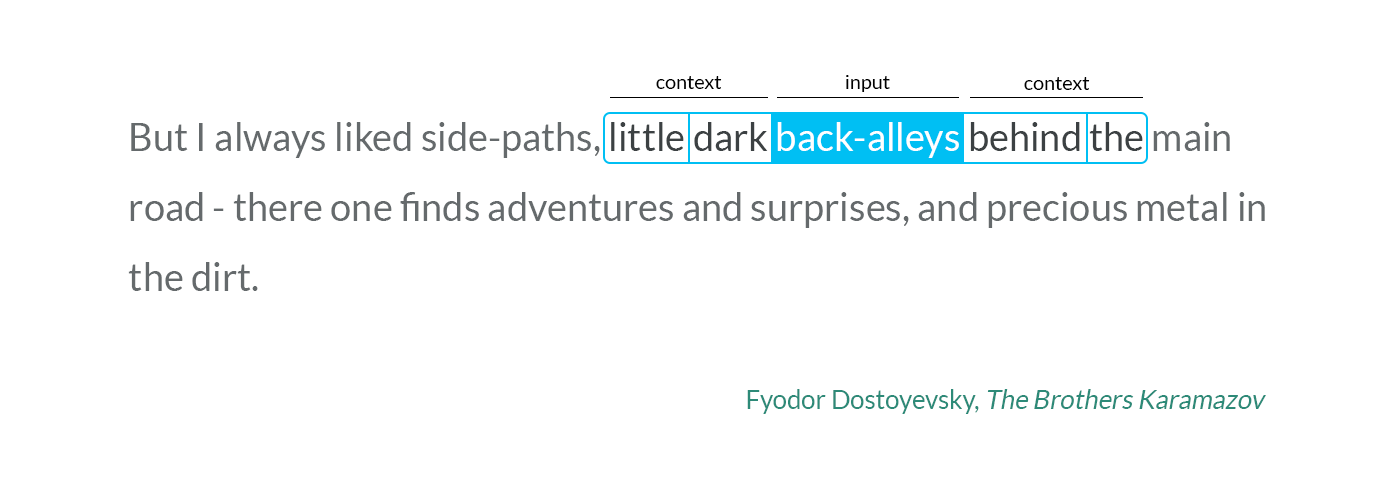

In [31]:
["back-alleys", "little"]
["back-alleys", "dark"]
["back-alleys", "behind"]
["back-alleys", "behind"]
["back-alleys", "the"]

['back-alleys', 'the']

In [32]:
import numpy as np

np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        #print(list(idx))
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

def concat(*iterables):
    for iterable in iterables:
        yield from iterable

def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

X, y = generate_training_data(tokens, word_to_id, 2)

In [33]:
id_to_word[np.argmax(X[0])], id_to_word[np.argmax(y[0])]

('yapay', 'zekâ')

In [34]:
id_to_word[np.argmax(X[1])], id_to_word[np.argmax(y[1])]

('yapay', 'insanlar')

In [35]:
id_to_word[np.argmax(X[2])], id_to_word[np.argmax(y[2])]

('zekâ', 'yapay')

In [36]:
len(id_to_word)

150

The Embedding ModelPermalink
At this point, you might be wondering how it is that training a neural network that predicts some nearby context word given an input token can be used to embed words into vectors. After all, the output of the network is going to be some probability vector that passed through a softmax layer, not an embedding vector.

This is entirely correct, and this is a question that came to my mind as well. However, this is the part that gets the most interesting: the rows of the intermediate weight matrix is the embedding we are looking for! This becomes much more apparent once we consider the dimensions of the weight matrices that compose the model. For simplicity purposes, say we have a total of 5 words in the corpus, and that we want to embed these words as three-dimensional vectors.

More specifically, here is the first weight layer of the model:


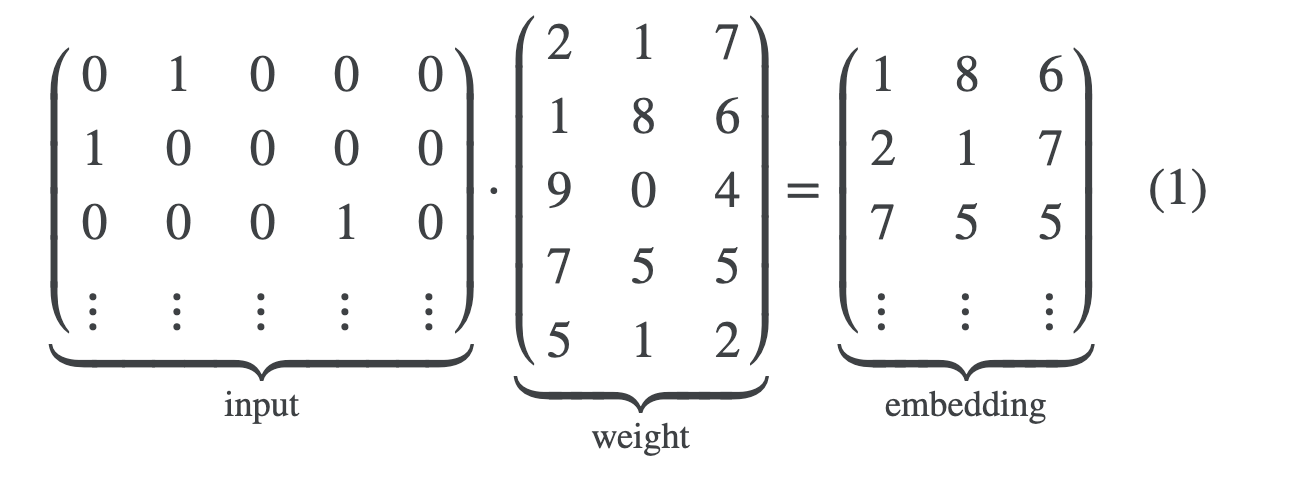

A crucial observation to make is that, because the input is a sparse vector containing one-hot encoded vectors, the weight matrix effectively acts as a lookup table that moves one-hot encoded vectors to dense vectors in a different dimension—more precisely, the row space of the weight matrix. In this particular example, the weight matrix was a transformation of ℝ5→ℝ3. This is exactly what we want to achieve with embedding: representing words as dense vectors, a step-up from simple one-hot encoding. This process is exactly what embedding is: as we start training this model with the training data generated above, we would expect the row space of this weight matrix to encode meaningful semantic information from the training data.

Continuing onwards, here is the second layer that receives as input the embeddings, then uses them to generate a set of outputs.
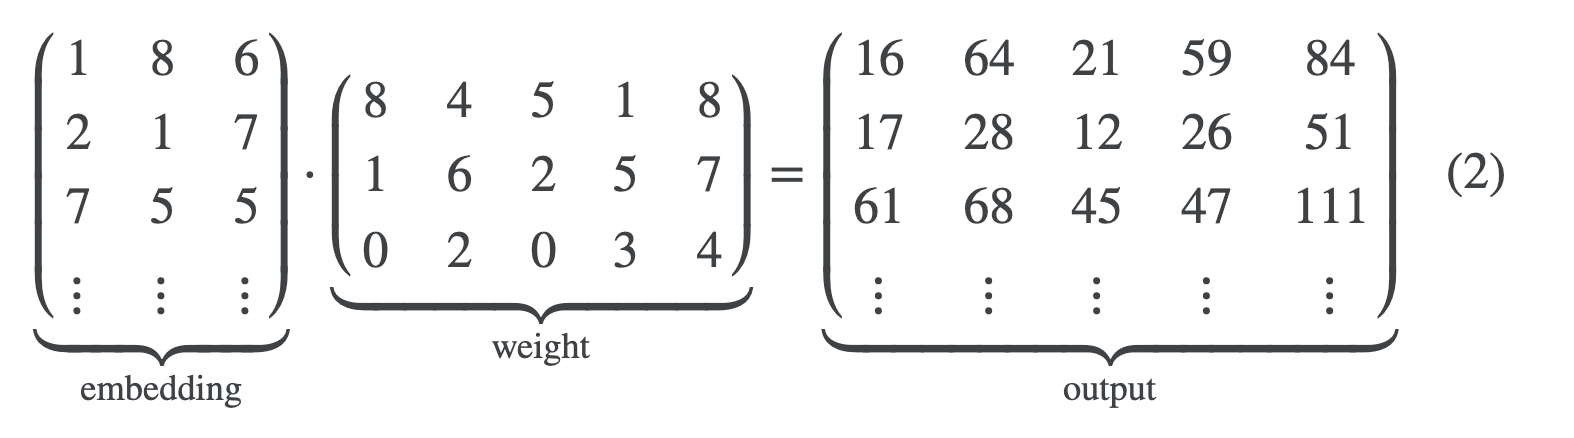

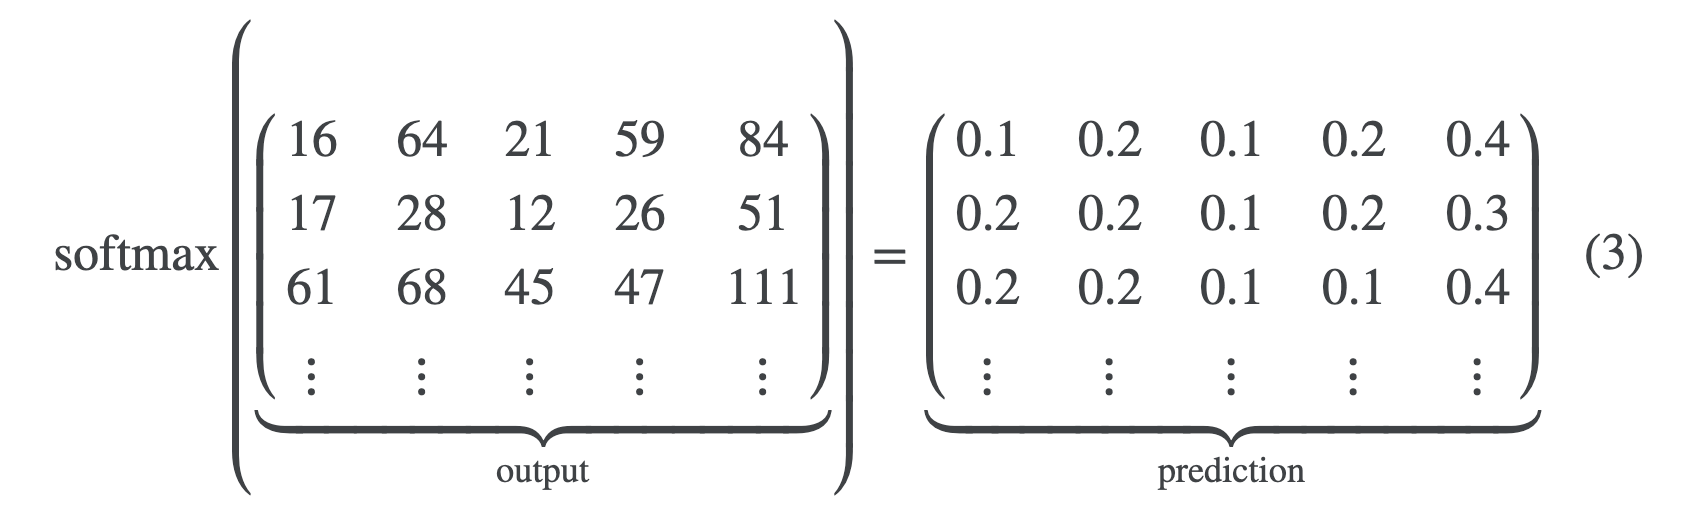

**Initialize the model**

In [37]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

Let’s specify our model to create **ten-dimensional** embeddings. In other words, each token will be represented as vectors living in ten-dimensional space. Note that actual models tend to use much higher dimensions, most commonly **300**, but for our purposes this is not necessary.

In [38]:
model = init_network(len(word_to_id), 20)

Forward Propagation
Let’s begin with forward propagation. Coding the forward propagation process simply amounts to transcribing the three matrix multiplication equations into NumPy code.

In [39]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

For backpropagation, we will need all the intermediate variables, so we hold them in a dictionary called cache. However, if we simply want the final prediction vectors only, not the cache, we set return_cache to False. This is just a little auxiliary feature to make things slightly easier later.

We also have to implement the softmax() function we used above. Note that this function receives a matrix as input, not a vector, so we will need to slightly tune things up a bit using a simple loop.

BackpropagationPermalink
Implementing backward propagation is slightly more difficult than forward propagation. However, the good news is that we have already derived the equation for backpropagation given a softmax layer with cross entropy loss in this post, where we built a neural network from scratch. The conclusion of the lengthy derivation was ultimately that

$$\frac{\partial L}{\partial A_2}=Z−y$$
given our model

$$A1=XW1$$
$$A2=A1W2$$
$$Z=softmax(A2)$$(6)

Since we know the error, we can now backpropagate it throughout the entire network, recalling basic principles of matrix calculus. If backprop is still confusing to you due to all the tranposes going on, one pro-tip is to think in terms of dimensions. After all, the dimension of the gradient must equal to the dimension of the original matrix. With that in mind, let’s implement the backpropagation function.

In [40]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

## Training and testing the model

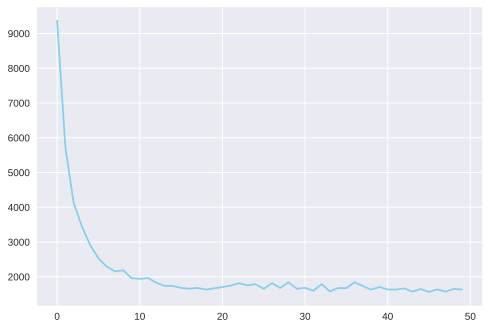

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

## Predictions

In [42]:
#learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
learning = one_hot_encode(word_to_id["zeka"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]
np.shape(result)


(150,)

In [43]:
np.argsort(result)[::-1]

array([ 15,  80, 140, 103,  94, 145, 106,   8,  73, 124,  48, 118, 128,
        68,  64,   6, 132,  97,  49,  65,  44,  36, 122,  54,  12, 143,
       114,  85, 108,  18,  21, 102,  55,  25,  62, 110,  34, 135,  11,
       123,  19, 133,  84,  79,   3, 101,  76, 148,  20, 104, 112,  51,
        92,  61, 129,  91,  40,  45, 107,  96,   4, 116,  77, 121,  47,
        50, 136,  57,  26,  41,  72,  38,  17,  27,  43, 117, 142,  82,
        71,  33,  75, 144, 111, 134, 141,  95,  98,   0,  70,  23,   2,
        53,   5,  22,  29,  14,   7, 139,  60, 147,  32,  37,  30,  69,
        86, 146,  81,  58,  89,  78,  67,  59,  31, 109, 120,  39,  10,
       130,  56, 131,   1, 105, 126, 127, 113, 137,  35, 115,  83,  46,
        28,  42, 119,  13,  66,  93, 100,  16,  88,  90,  99, 125,   9,
       138,  87,  63,  74,  52, 149,  24])

## List the closest words 

In [44]:
for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

genellikle
gerektirdiği
ngilizce
olarak
düşünülen
sınıflandırılan
hale
i
ders
biyolojik
geldikçe
arasında
gelen
güçlü
terimi
kitapları
giden
kendi
lk
ve
anlama
espri
yapılmamış
gerçekleştiren
görevler
eden
etme
tanımlamak
çıkar
arasındaki
gittikçe
herhangi
girişimleri
işlevleri
karakter
kategoriler
zihni
çeşididir
zekânın
için
henüz
hedeflerine
simülasyonları
teoremindeki
çıkarılır
rekabet
ile
zeka
zekâ
yetenekleri
biological
çıkaran
değerlendirilen
go
makine
en
düzeye
kapsar
ayrım
başarıyla
doğal
zekayı
stratejik
arabalar
çevresini
konuşmasını
tesler'in
askeri
optik
insan
yapay
düzeyde
kendine
satranç
etiketlenirken
bilinen
şeydir
fenomen
makineler
eylemleri
intelligence
alanı
tanımlar
üst
ilişkilendirdiği
der
makineleri
yetenekli
ikinci
görüntülenen
genel
algılayan
insanlar
teknoloji
bir
artificial
olan
insanların
etkisi
daha
tanımından
tutulur
önde
bilişsel
oyun
ai
kullanılır
ulaşma
adlandırılır
problem
taklit
poker
çözme
kısaltmayla
sistemlerinde
dışında
ortaya
seçilen
zeki
akıllı


In [ ]:
forward(model, X, return_cache=False)

### Embedding of first word


In [46]:
id_to_word[np.argmax(X[0])]

'yapay'

In [47]:
embedding_1 = forward(model, X[0], return_cache=True)["a1"]


embedding_2 = forward(model, X[5], return_cache=True)["a1"]

In [48]:
embedding_1 - embedding_2

array([ 0.23219435,  0.18316523,  0.40956875,  1.12031617,  0.59568095,
       -0.83773987, -2.40439473,  0.27729341,  0.2713771 ,  0.63520761,
        0.29704883, -0.57078176,  0.26365929, -1.3628053 ,  0.59422139,
       -2.26434316,  0.55281891,  1.33386254, -0.06338335, -0.27627411])

In [49]:
len(embedding_1)

20